#EDA ON USED CAR PRICES

#Data Dictionary

This Dataset consists of used cars prices.

Company - Name of the Used car's Company

Model - Model number/name of the Car

Year - Used Car's manufacturing year

price - Price of the Used Car

transmission - Transmission of the Used Car

mileage - Miles covered by the car

fuel type - Type of fuel the car uses to run

Tax - Road Tax for the car

Mpg -  The number of miles that a car can travel per gallon of fuel.  

engine size - Size of the engine



#Import Data

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/UsedCars.csv'

#Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Functions used in the Project

In [4]:
class price_prediction:
  def __init__(self,path1):
    self.path1 = path
  
  def load_data(self):
    self.df = pd.read_csv(path)
    print(self.df)
  
  def nulls(self):
      print(f'\nShow number of missing instances per feature \n' + '--'*10 )
      display(self.isnull())
      print(f'\nShow number of present instances per feature \n' + '--'*10 )
      display(self.notnull())
      display(self.check_missing_values_custom())
      return
    
  def isnull(self):
      return self.df.isnull().sum()
    
  def notnull(self):
      return self.df.notnull().sum()
    
  def check_missing_values_custom(self):
        # get number of features and records
        print("Shape", self.df.shape)
        # get names of columns and place in list
        list_name = self.df.columns.to_list()
        for i in list_name:
            item_counts = self.df[i].value_counts()
            items = self.df[i].unique()
            print("\n" + '** '*10 )
            print("\nFeature:", i)
            print("\nNumber of unique values:", len(items),"\n")
            print(items)
            print("_ _ _ _ _ _ _ _ _ _ _ _ _ _\n")
            print(item_counts)
            print("___________________________\n")
        return
  
  def drop_na(self):
    self.df = self.df.dropna()
    print(self.df)
  
  def drop_duplicate(self):
    self.dfDropped = self.df.drop_duplicates(keep = 'first')
    print(self.dfDropped)

  def describe(self):
    self.dfDescribe = self.df.describe()
    print(self.dfDescribe)
  
  def describe_exclusive(self):
    self.intCols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
    for ele in self.intCols:
      self.dfDropped[ele] = pd.to_numeric(self.dfDropped[ele], errors = 'coerce')
    self.dfModified = self.dfDropped.dropna()
    print(self.dfModified.describe())

  def check_data_types(self):
    self.dfModified.dtypes
    print( self.dfModified.dtypes)

  def draw_boxplots(self):
    for ele in self.intCols:
      sns.boxplot(x = self.dfModified[ele])
      plt.show()
  
  def filter_quantile(self, args):
    # Filtering out data <1 percentile and >99percentile    
    lower = self.dfModified[args].quantile(0.01)
    upper = self.dfModified[args].quantile(0.99)
    self.dfModified = self.dfModified[(self.dfModified[args] >= lower) & (self.dfModified[args] <= upper)]
    # print(self.dfOutlier)

  def data_clean(self):
    try:
      self.intCols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
      for ele in self.intCols:
        self.filter_quantile(ele)

      self.dfOutlier = self.dfModified
      print(self.dfOutlier.describe())

    except:
      print("Error has occured in the Data Clean stage")

  def draw_boxplotsFilteredData(self):
    for ele in self.intCols:
      sns.boxplot(x = self.dfOutlier[ele])
      plt.show()
      # print(self.filtered_data.describe())
  
  def draw_pairplots(self):
    sns.pairplot(self.dfOutlier)

  def draw_scatterplot(self, *args):
    sns.scatterplot(data = self.dfOutlier, x = args[0], y = args[1])
    plt.show()

  def draw_scatter(self, args):
      sns.displot(data=self.dfOutlier,  x=args,  kind="hist",  aspect=1.4)
      plt.show()

  def draw_catplots(self, *args):
    sns.catplot(x = args[0], y = args[1], data = self.dfOutlier, height = 5, aspect = 1.5)
    plt.show()

    sns.catplot(x = args[2], y = args[1], data = self.dfOutlier, height = 5, aspect = 1.5)
    plt.show()

  def correlation(self):
    sns.heatmap(self.dfOutlier.corr(), annot=True, cmap="coolwarm")
    plt.show()

  def draw_heat_map(self):
    self.dfCorr = self.dfOutlier.corr()
    sns.heatmap(self.dfCorr, annot = True)
   
  def get_post_cleaning_data(self):
     return self.dfOutlier
  

#Loading the data

In [5]:
pr= price_prediction(path)

pr.load_data()

       Company model  year  price transmission mileage fuelType  tax   mpg  \
0         Audi    A1  2017  12500       Manual   15735   Petrol  150  55.4   
1         Audi    A6  2016  16500    Automatic   36203   Diesel   20  64.2   
2         Audi    A1  2016  11000       Manual   29946   Petrol   30  55.4   
3         Audi    A4  2017  16800    Automatic   25952   Diesel  145  67.3   
4         Audi    A3  2019  17300       Manual    1998   Petrol  145  49.6   
...        ...   ...   ...    ...          ...     ...      ...  ...   ...   
103088      Vw   Eos  2012   5990       Manual   74000   Diesel  125  58.9   
103089      Vw   Fox  2008   1799       Manual   88102   Petrol  145  46.3   
103090      Vw   Fox  2009   1590       Manual   70000   Petrol  200    42   
103091      Vw   Fox  2006   1250       Manual   82704   Petrol  150  46.3   
103092      Vw   Fox  2007   2295       Manual   74000   Petrol  145  46.3   

       engineSize  
0             1.4  
1               2  
2  

# Checking for Missing Values

The method called below gives information in detail about the number of missing and present values per feature in the dataset as well as provide details about the possible values a feature may have and the number of times they occur. More on this will follow later on in the notebook when we visualize data per feature looking for the outlier.

In [6]:
pr.nulls()


Show number of missing instances per feature 
--------------------


Company         3900
model           3900
year            3900
price           3900
transmission    3900
mileage         3900
fuelType        3900
tax             3900
mpg             3900
engineSize      3900
dtype: int64


Show number of present instances per feature 
--------------------


Company         99193
model           99193
year            99193
price           99193
transmission    99193
mileage         99193
fuelType        99193
tax             99193
mpg             99193
engineSize      99193
dtype: int64

Shape (103093, 10)

** ** ** ** ** ** ** ** ** ** 

Feature: Company

Number of unique values: 12 

['Audi' 'bmw' nan 'Company' 'Ford' 'Hyundai' 'Compnay' 'Merc' 'Skoda'
 'Toyota' 'Vauxhall' 'Vw']
_ _ _ _ _ _ _ _ _ _ _ _ _ _

Ford        17965
Vw          15157
Vauxhall    13632
Merc        13119
bmw         10781
Audi        10668
Toyota       6738
Skoda        6267
Hyundai      4860
Company         5
Compnay         1
Name: Company, dtype: int64
___________________________


** ** ** ** ** ** ** ** ** ** 

Feature: model

Number of unique values: 197 

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7' ' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series'
 ' 2 Series' ' 4 Series' ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4'
 ' X2' ' X6' ' 8 Series' ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'
 nan 'model' ' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX'
 ' Mondeo'

None

#Dropping Null values

Removing the null/missing values from the dataset and the updated dataset will be used hereon.  

In [7]:
pr.drop_na()

       Company model  year  price transmission mileage fuelType  tax   mpg  \
0         Audi    A1  2017  12500       Manual   15735   Petrol  150  55.4   
1         Audi    A6  2016  16500    Automatic   36203   Diesel   20  64.2   
2         Audi    A1  2016  11000       Manual   29946   Petrol   30  55.4   
3         Audi    A4  2017  16800    Automatic   25952   Diesel  145  67.3   
4         Audi    A3  2019  17300       Manual    1998   Petrol  145  49.6   
...        ...   ...   ...    ...          ...     ...      ...  ...   ...   
103088      Vw   Eos  2012   5990       Manual   74000   Diesel  125  58.9   
103089      Vw   Fox  2008   1799       Manual   88102   Petrol  145  46.3   
103090      Vw   Fox  2009   1590       Manual   70000   Petrol  200    42   
103091      Vw   Fox  2006   1250       Manual   82704   Petrol  150  46.3   
103092      Vw   Fox  2007   2295       Manual   74000   Petrol  145  46.3   

       engineSize  
0             1.4  
1               2  
2  

#Dropping duplicate values 

Removing the duplicate values from the dataset and updating the dataset.

In [8]:
pr.drop_duplicate()

       Company model  year  price transmission mileage fuelType  tax   mpg  \
0         Audi    A1  2017  12500       Manual   15735   Petrol  150  55.4   
1         Audi    A6  2016  16500    Automatic   36203   Diesel   20  64.2   
2         Audi    A1  2016  11000       Manual   29946   Petrol   30  55.4   
3         Audi    A4  2017  16800    Automatic   25952   Diesel  145  67.3   
4         Audi    A3  2019  17300       Manual    1998   Petrol  145  49.6   
...        ...   ...   ...    ...          ...     ...      ...  ...   ...   
103088      Vw   Eos  2012   5990       Manual   74000   Diesel  125  58.9   
103089      Vw   Fox  2008   1799       Manual   88102   Petrol  145  46.3   
103090      Vw   Fox  2009   1590       Manual   70000   Petrol  200    42   
103091      Vw   Fox  2006   1250       Manual   82704   Petrol  150  46.3   
103092      Vw   Fox  2007   2295       Manual   74000   Petrol  145  46.3   

       engineSize  
0             1.4  
1               2  
2  

#Descriptive Analysis

In [9]:
pr.describe()

       Company    model   year  price transmission mileage fuelType    tax  \
count    99193    99193  99193  99193        99193   99193    99193  99193   
unique      11      196     28  13237            5   42215        6     49   
top       Ford   Fiesta   2019   9995       Manual      10   Petrol    145   
freq     17965     6557  26771    594        56445     840    54928  48459   

          mpg engineSize  
count   99193      99193  
unique    209         41  
top      60.1          2  
freq     6160      27233  


since our data contains columns which are non numeric values we didn't get statistics like min, max, mean etc so we are only taking the columns having numeric values and doing the descriptive analysis for better understanding. 

In [10]:
pr.describe_exclusive()

<ipython-input-4-f532f34c9908>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dfDropped[ele] = pd.to_numeric(self.dfDropped[ele], errors = 'coerce')


               year          price        mileage           tax           mpg  \
count  97712.000000   97712.000000   97712.000000  97712.000000  97712.000000   
mean    2017.066870   16773.487555   23219.475499    120.142408     55.205623   
std        2.122993    9868.552222   21060.882301     63.357250     16.181659   
min     1970.000000     450.000000       1.000000      0.000000      0.300000   
25%     2016.000000    9999.000000    7673.000000    125.000000     47.100000   
50%     2017.000000   14470.000000   17682.500000    145.000000     54.300000   
75%     2019.000000   20750.000000   32500.000000    145.000000     62.800000   
max     2060.000000  159999.000000  323000.000000    580.000000    470.800000   

         engineSize  
count  97712.000000  
mean       1.664913  
std        0.558574  
min        0.000000  
25%        1.200000  
50%        1.600000  
75%        2.000000  
max        6.600000  


#To check datatypes

In [11]:
pr.check_data_types()

Company          object
model            object
year            float64
price           float64
transmission     object
mileage         float64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object


#Check for Outliers

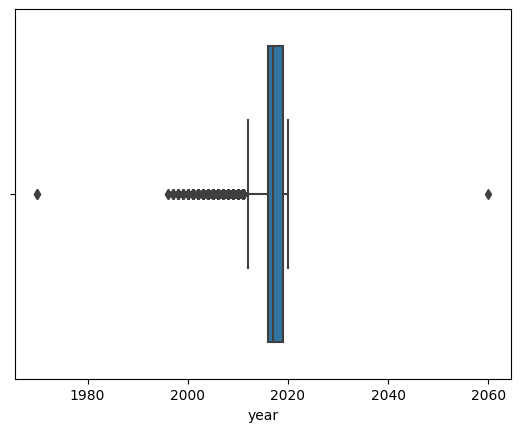

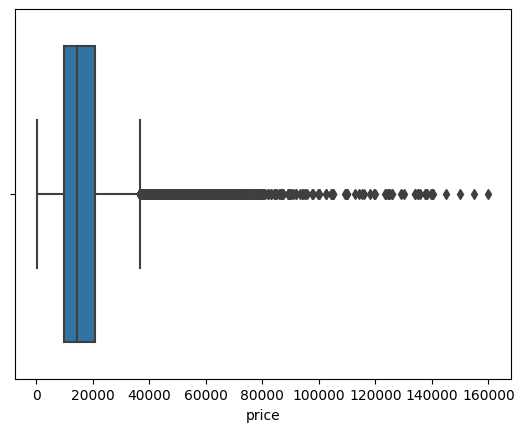

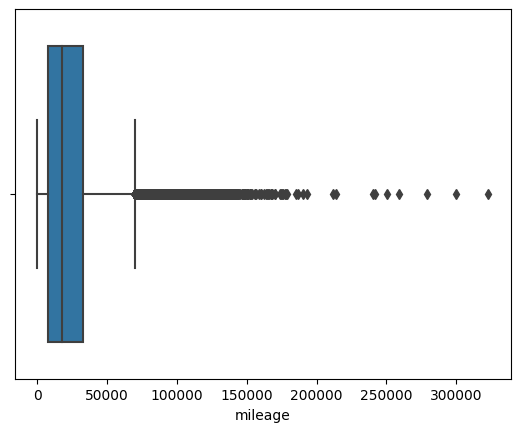

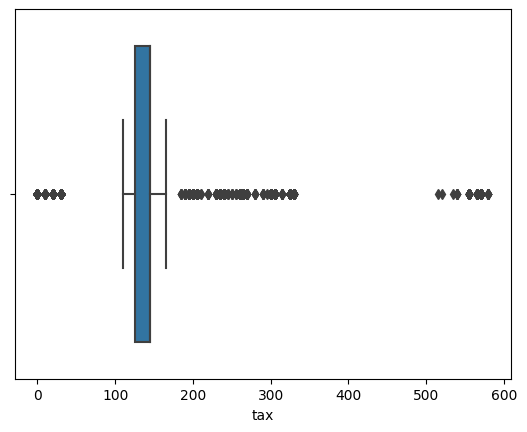

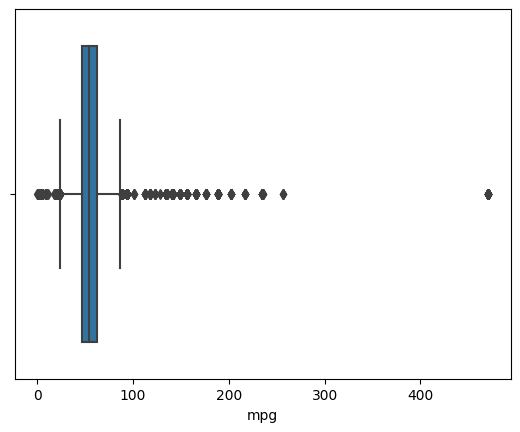

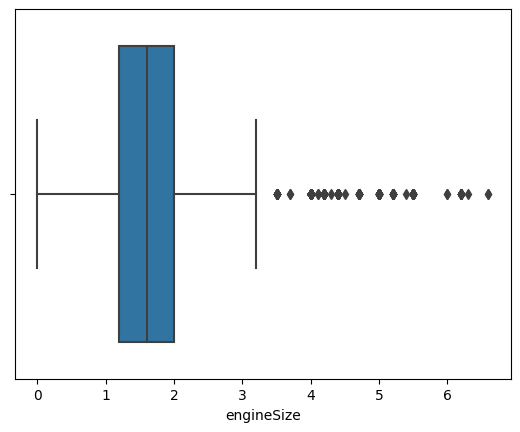

In [12]:
pr.draw_boxplots()

In the above plots, it's evident that there are a signficant amount of outliers in all the numeric columns.

So, we will remove the data that's falling outside 1st or 99th percentile for each feature.

#Cleaning the Data 

Here we have removed the data that's falling outside the 1st or 99th percentile.

In [13]:
pr.data_clean()

               year         price       mileage           tax           mpg  \
count  90319.000000  90319.000000  90319.000000  90319.000000  90319.000000   
mean    2017.212945  16286.936459  21680.147300    117.820503     55.097481   
std        1.719951   8084.226745  17502.469454     57.669069     10.584832   
min     2010.000000   4990.000000     11.000000      0.000000     31.700000   
25%     2016.000000  10200.000000   7917.000000    125.000000     47.100000   
50%     2017.000000  14390.000000  17363.000000    145.000000     55.400000   
75%     2019.000000  20249.500000  31217.000000    145.000000     62.800000   
max     2020.000000  52496.000000  86863.000000    260.000000     85.600000   

         engineSize  
count  90319.000000  
mean       1.629494  
std        0.488006  
min        1.000000  
25%        1.200000  
50%        1.500000  
75%        2.000000  
max        3.000000  


#Performing Outlier Check Again

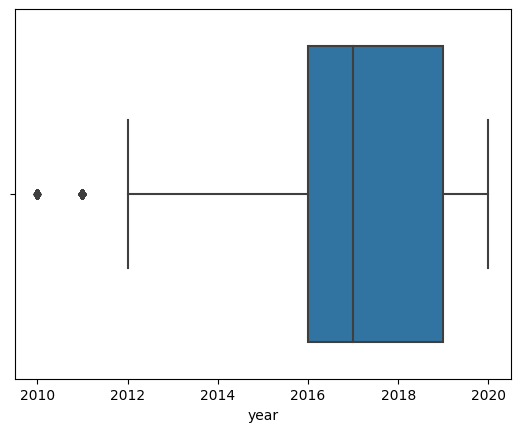

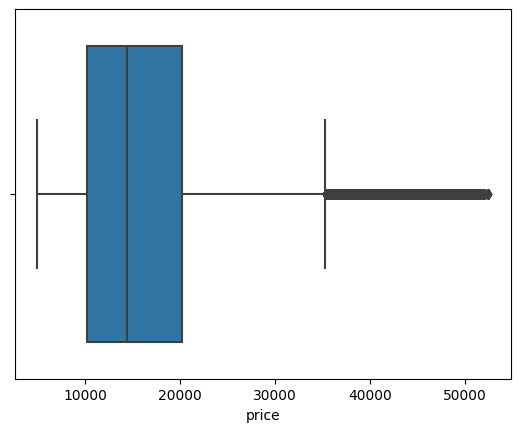

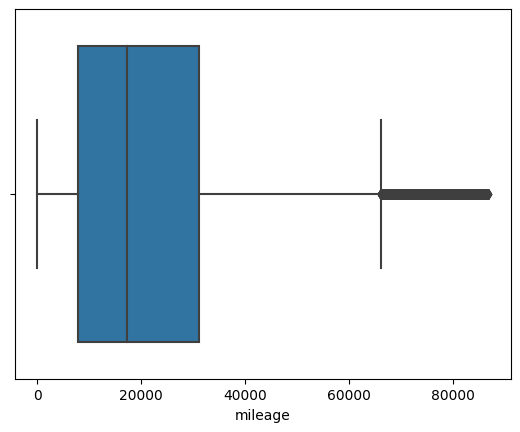

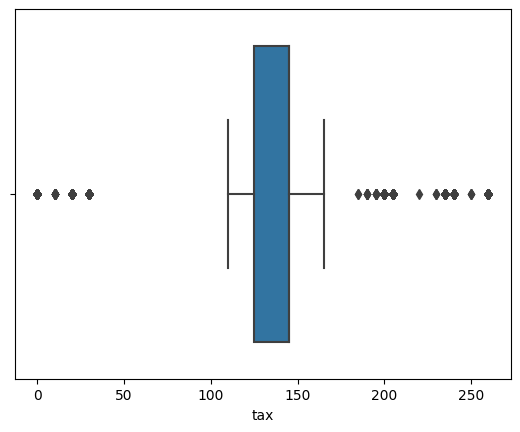

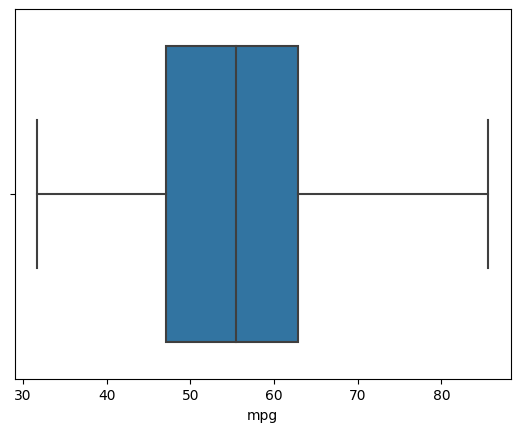

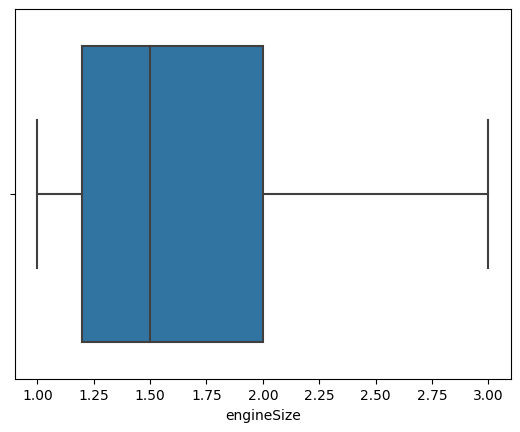

In [14]:
pr.draw_boxplotsFilteredData()

We can clearly notice the difference in the Boxplots generated using previous data and cleaned data

#Pairplots

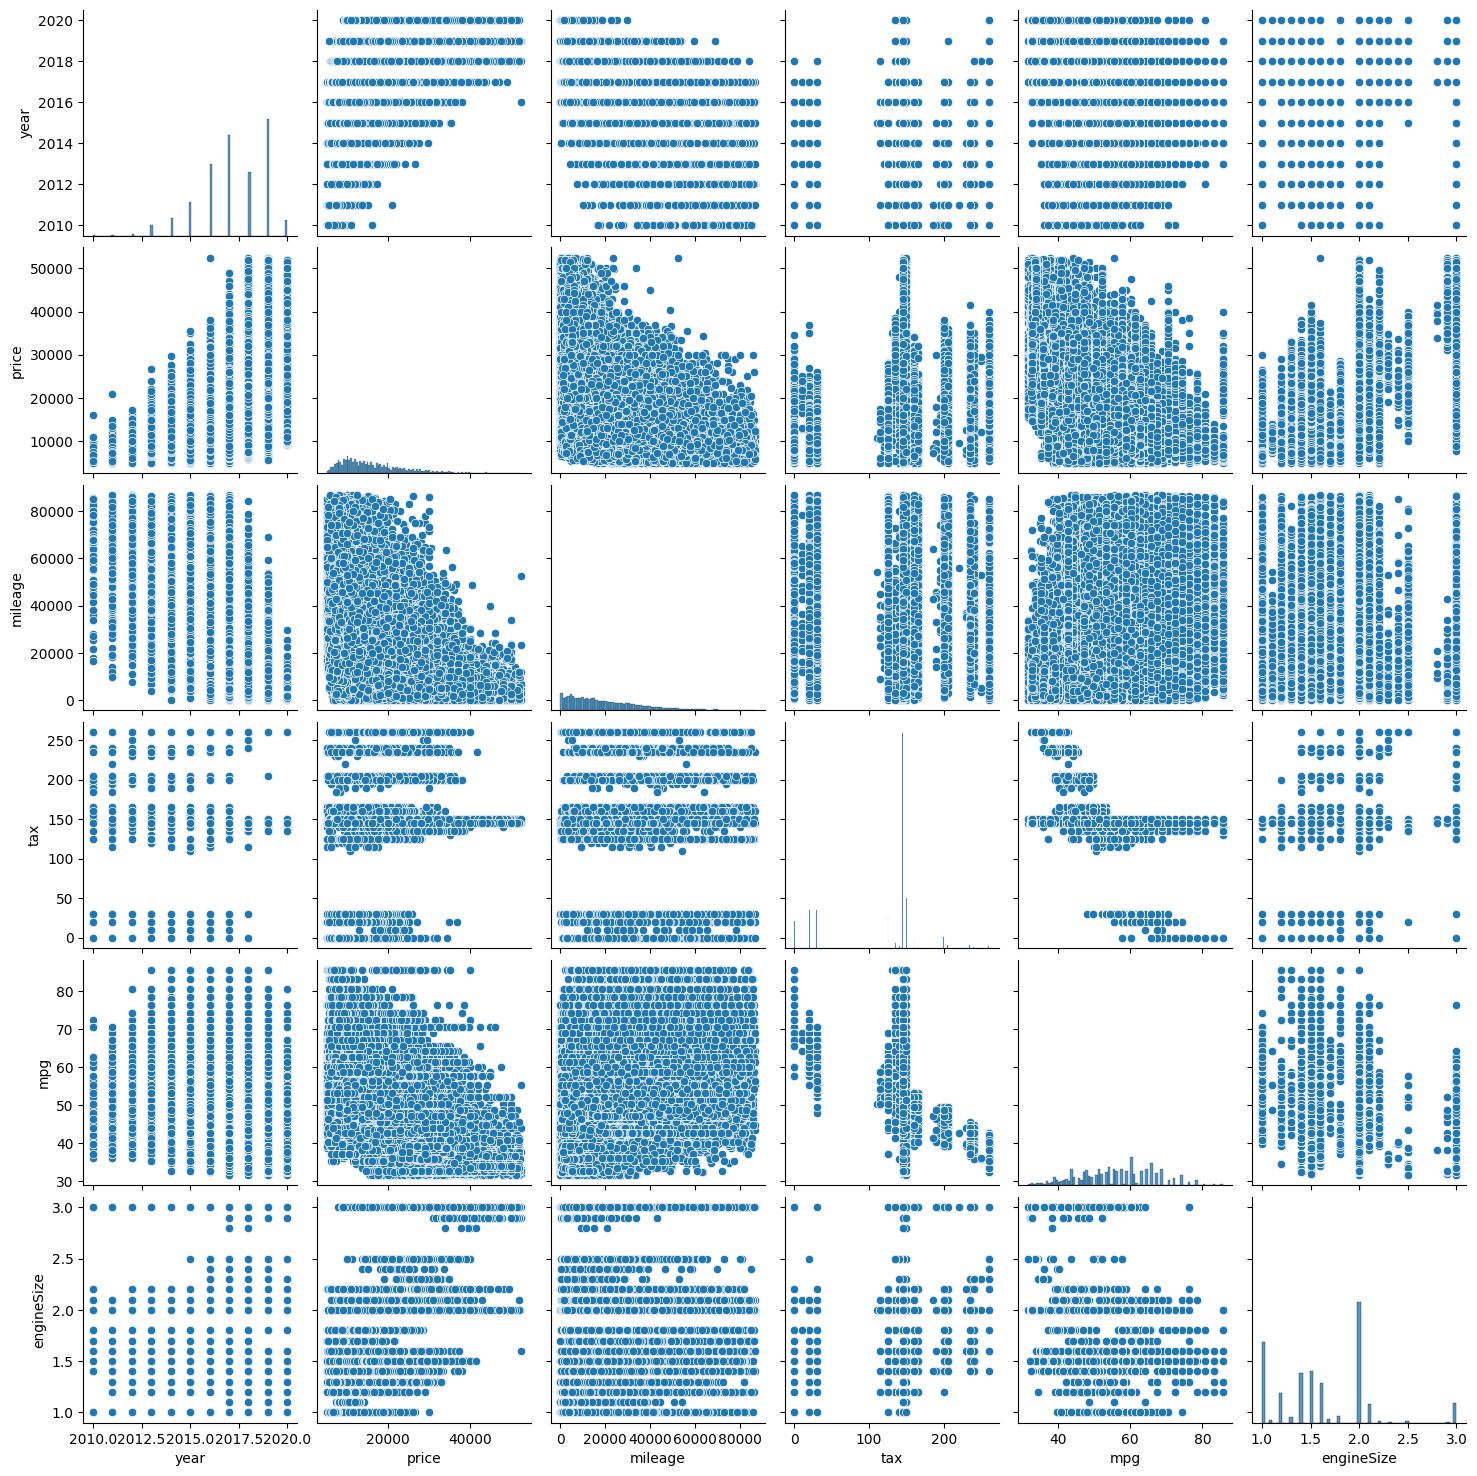

In [15]:
pr.draw_pairplots()

These pairplots are helpful in understanding the relationship between any two features.

### **Scatterplots and catplots**

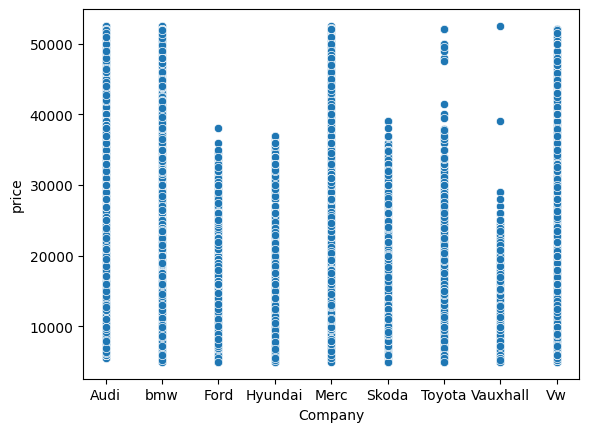

In [16]:
pr.draw_scatterplot('Company','price')

From the above scatterplots we can clearly see Audi, Merc, bmw have more expensive used cars compared to others.

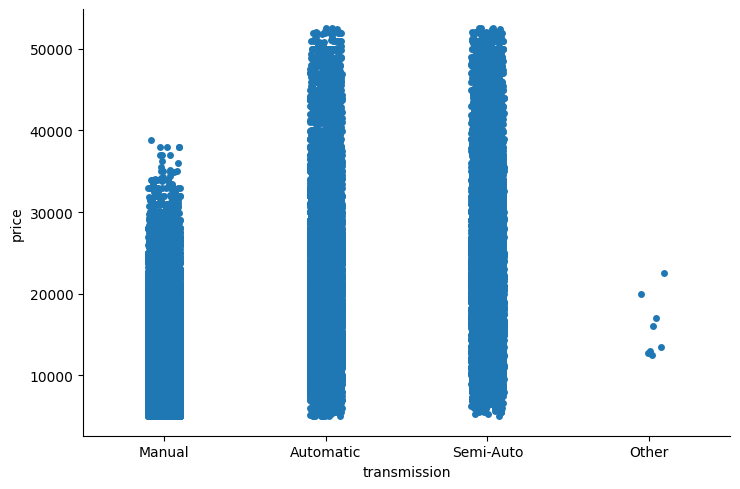

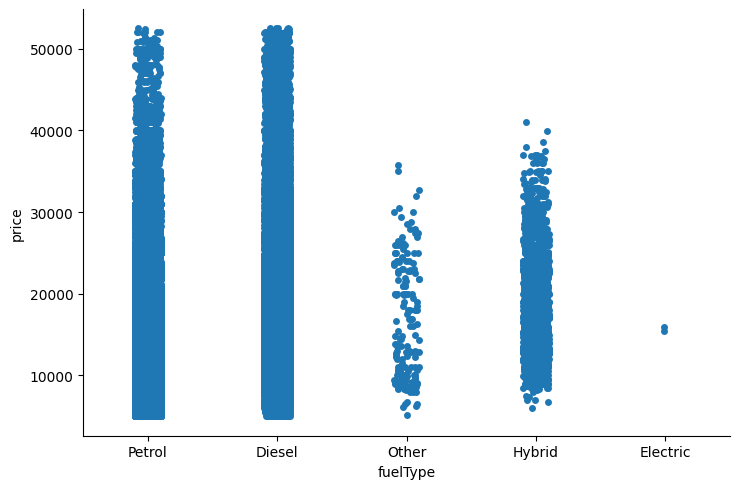

In [17]:
pr.draw_catplots('transmission','price','fuelType')

From above catplots we can tell that Automatic and semi auto vehicles are more in number and are expensive compared to Manual.

Petrol and Diesel are expensive compared to the rest.

One more thing we can notice is that there are very less electric cars compared to petrol, diesel and hybrid variants. 

These depictions can be baised because our dataset has less data on electric cars. 

## **HeatMap**

<ipython-input-4-f532f34c9908>:116: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.dfCorr = self.dfOutlier.corr()


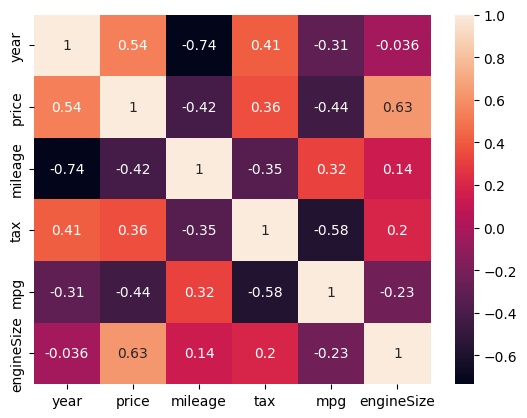

In [18]:
pr.draw_heat_map()

From the above heatmap, following observations were made:
1. There is a very strong negative correlation between mileage and year of vehicle. This is expected because newer vehicles would have been used lesser than older counterparts
2. engineSize shows strong correlation with price i.e. Cars with bigger engines cost more
3. Few other pairs with signficant correlation are: {'year': 'price', 'price': 'mileage', 'tax', 'mpg'}

# Data Preparation for Modelling

In [19]:
clean_data = pr.get_post_cleaning_data()

In [20]:
clean_data

,Company,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4
1,Audi,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0
2,Audi,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4
3,Audi,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0
4,Audi,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
103081,Vw,Caddy Maxi,2017.0,15950.0,Semi-Auto,25510.0,Diesel,145.0,56.5,2.0
103082,Vw,Eos,2011.0,7195.0,Manual,43000.0,Petrol,185.0,41.5,1.4
103085,Vw,Eos,2015.0,12495.0,Manual,41850.0,Diesel,125.0,58.9,2.0
103086,Vw,Eos,2014.0,8950.0,Manual,58000.0,Diesel,125.0,58.9,2.0


# One-Hot Encoding

As many machine learning models need their input variables to be numeric, categorical variables need to be transformed in the pre-processing part. Pandas has a function which can turn a categorical variable into a series of zeros and ones, which makes them a lot easier to quantify and compare.

Since, our dataframe contains categorical data ('transmission' and 'fuelType') which we presumably may contirbute in predicting the price of UsedCars, hence we will use One-Hot Encoding to convert it into numerical type for regression models. 

# Converting fuelType and transmission data into numerical type

In [21]:
ohe_fuelType = pd.get_dummies(clean_data['fuelType'], prefix = 'Fuel')
ohe_fuelType

,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other,Fuel_Petrol
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
103081,1,0,0,0,0
103082,0,0,0,0,1
103085,1,0,0,0,0
103086,1,0,0,0,0


In [22]:
ohe_transmission = pd.get_dummies(clean_data['transmission'], prefix = 'Tr')
ohe_transmission

,Tr_Automatic,Tr_Manual,Tr_Other,Tr_Semi-Auto
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
103081,0,0,0,1
103082,0,1,0,0
103085,0,1,0,0
103086,0,1,0,0


# Replacing the newly formed encoded columns in the place of original categorical colmuns (fuelType and transmission) in the dataframe

In [23]:
clean_data = pd.concat([clean_data, ohe_fuelType, ohe_transmission], axis=1)
clean_data

,Company,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other,Fuel_Petrol,Tr_Automatic,Tr_Manual,Tr_Other,Tr_Semi-Auto
0,Audi,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0
1,Audi,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0
2,Audi,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0
3,Audi,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0
4,Audi,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103081,Vw,Caddy Maxi,2017.0,15950.0,Semi-Auto,25510.0,Diesel,145.0,56.5,2.0,1,0,0,0,0,0,0,0,1
103082,Vw,Eos,2011.0,7195.0,Manual,43000.0,Petrol,185.0,41.5,1.4,0,0,0,0,1,0,1,0,0
103085,Vw,Eos,2015.0,12495.0,Manual,41850.0,Diesel,125.0,58.9,2.0,1,0,0,0,0,0,1,0,0
103086,Vw,Eos,2014.0,8950.0,Manual,58000.0,Diesel,125.0,58.9,2.0,1,0,0,0,0,0,1,0,0


In [24]:
clean_data =clean_data.drop(['fuelType','transmission'], axis = 1)
clean_data

,Company,model,year,price,mileage,tax,mpg,engineSize,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other,Fuel_Petrol,Tr_Automatic,Tr_Manual,Tr_Other,Tr_Semi-Auto
0,Audi,A1,2017.0,12500.0,15735.0,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0
1,Audi,A6,2016.0,16500.0,36203.0,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0
2,Audi,A1,2016.0,11000.0,29946.0,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0
3,Audi,A4,2017.0,16800.0,25952.0,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0
4,Audi,A3,2019.0,17300.0,1998.0,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103081,Vw,Caddy Maxi,2017.0,15950.0,25510.0,145.0,56.5,2.0,1,0,0,0,0,0,0,0,1
103082,Vw,Eos,2011.0,7195.0,43000.0,185.0,41.5,1.4,0,0,0,0,1,0,1,0,0
103085,Vw,Eos,2015.0,12495.0,41850.0,125.0,58.9,2.0,1,0,0,0,0,0,1,0,0
103086,Vw,Eos,2014.0,8950.0,58000.0,125.0,58.9,2.0,1,0,0,0,0,0,1,0,0


#Removing the features not effectively required for our models.


In [25]:
dfDummies = clean_data.drop(['Company','model'], axis=1)
dfDummies

,year,price,mileage,tax,mpg,engineSize,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other,Fuel_Petrol,Tr_Automatic,Tr_Manual,Tr_Other,Tr_Semi-Auto
0,2017.0,12500.0,15735.0,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0
1,2016.0,16500.0,36203.0,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0
2,2016.0,11000.0,29946.0,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0
3,2017.0,16800.0,25952.0,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0
4,2019.0,17300.0,1998.0,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103081,2017.0,15950.0,25510.0,145.0,56.5,2.0,1,0,0,0,0,0,0,0,1
103082,2011.0,7195.0,43000.0,185.0,41.5,1.4,0,0,0,0,1,0,1,0,0
103085,2015.0,12495.0,41850.0,125.0,58.9,2.0,1,0,0,0,0,0,1,0,0
103086,2014.0,8950.0,58000.0,125.0,58.9,2.0,1,0,0,0,0,0,1,0,0


# Importing the required Libraries for preparing the training and test dataset as well as working with Regression Models

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

##Splitting the Dataset

We will split the data sets into their input (features) and target (label) variables. Then we'll divide the data into training and testing sets so that once the training of the model is complete, we can evaluate its performance using testing data. Specifically, we're assigning 20% of the data to serve as testing data with remaining 80% used to help train the model. Additionally, you can use random_state to select records randomly. Seeding this with a value ensures reproducibility. 

## Preparing the Input(Features) Variable

In [27]:
x = dfDummies.drop(columns = ['price'])
x

,year,mileage,tax,mpg,engineSize,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other,Fuel_Petrol,Tr_Automatic,Tr_Manual,Tr_Other,Tr_Semi-Auto
0,2017.0,15735.0,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0
1,2016.0,36203.0,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0
2,2016.0,29946.0,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0
3,2017.0,25952.0,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0
4,2019.0,1998.0,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103081,2017.0,25510.0,145.0,56.5,2.0,1,0,0,0,0,0,0,0,1
103082,2011.0,43000.0,185.0,41.5,1.4,0,0,0,0,1,0,1,0,0
103085,2015.0,41850.0,125.0,58.9,2.0,1,0,0,0,0,0,1,0,0
103086,2014.0,58000.0,125.0,58.9,2.0,1,0,0,0,0,0,1,0,0


## Preparing the Target(label) variable

In [28]:
y = dfDummies.price
y

0         12500.0
1         16500.0
2         11000.0
3         16800.0
4         17300.0
           ...   
103081    15950.0
103082     7195.0
103085    12495.0
103086     8950.0
103088     5990.0
Name: price, Length: 90319, dtype: float64

## Standardizing the Data

Standardization (or scaling) makes it easier for machine learning to handle data by ensuring that features more or less fit into a normal distribution curve. Otherwise, you run the risk of the model failing to make reasonable predictions due to large variations in  values.

In [29]:
scaler = MinMaxScaler()
cols = x.columns
x = pd.DataFrame(scaler.fit_transform(x), columns = cols)
x.head()

,year,mileage,tax,mpg,engineSize,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other,Fuel_Petrol,Tr_Automatic,Tr_Manual,Tr_Other,Tr_Semi-Auto
0,0.7,0.181044,0.576923,0.439703,0.2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.6,0.416709,0.076923,0.602968,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.6,0.344667,0.115385,0.439703,0.2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.7,0.298681,0.557692,0.660482,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.9,0.022878,0.557692,0.332096,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Assigning Test Dataset size ratio as 20% 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Modeling

## Implementing a linear regression Model

We'll first call the LinearRegression() class to create a simple regression model which we'll then fit to the training data.

In [31]:
# instantiating a regression model
linearModel = LinearRegression()

# Fitting the model
linearModel.fit(x_train,y_train)

LinearRegression()

## Our Model Equation

Once fitted, we can view the weights (coefficients) that the model will be using to predict new values.

In [32]:
#Intercept and Coefficient
print("Intercept: ", linearModel.intercept_)
print("Coefficients:")
list(zip(x, linearModel.coef_))

Intercept:  6464.345914615493
Coefficients:


[('year', 17633.0348331813),
 ('mileage', -7203.832429047646),
 ('tax', -3843.3592014504743),
 ('mpg', -9130.091767764017),
 ('engineSize', 15145.644143671201),
 ('Fuel_Diesel', 1283.5682201925983),
 ('Fuel_Electric', -2590.9826695385636),
 ('Fuel_Hybrid', 1676.8408006550924),
 ('Fuel_Other', 80.59946350059094),
 ('Fuel_Petrol', -450.0258148097071),
 ('Tr_Automatic', 1147.862759565267),
 ('Tr_Manual', -1980.9573623898455),
 ('Tr_Other', -1097.2237550237555),
 ('Tr_Semi-Auto', 1930.3183578483404)]

## Make Predictions on the Test Data set

With the model fitted, we can call the model.predict() method to make predictions on the x_test data. We can pass the values of x_test to this method and compare the predicted values called y_pred_model with y_test values to check how accurate our predicted values are.

In [33]:
#Prediction of test set
y_pred_model= linearModel.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_model))

#Actual value and the predicted value
mdl_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
mdl_diff.head(10)

Prediction for test set: [28193.70326577  9177.895267   12373.67745106 ... 13289.83702454
 36130.23787599  7414.74562141]


,Actual value,Predicted value
92597,28989.0,28193.703266
33702,9999.0,9177.895267
4969,19990.0,12373.677451
58187,18728.0,19929.943196
46556,9500.0,9998.709832
9939,14099.0,11635.482030
47565,17450.0,18047.608193
54383,39450.0,34719.625005
64928,8499.0,9910.721797
88032,16995.0,9476.697869


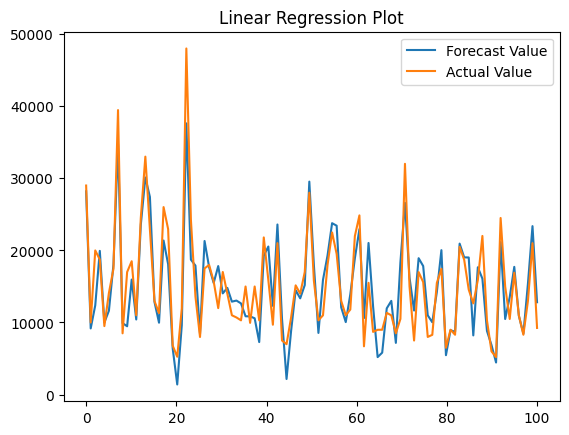

In [34]:
#Plotting using the linear regression model

y_pred1= linearModel.predict(x_test.iloc[:100,:])

plt.plot(np.linspace(0, len(y_pred1), len(y_pred1)), y_pred1, label = "Forecast Value")
plt.plot(np.linspace(0, len(y_pred1), len(y_pred1)), y_test.iloc[:100], label = "Actual Value")
plt.legend()
plt.title('Linear Regression Plot')
plt.show()

## Evaluating the Linear Regression model

Here, the score is used as a measure of how well the linear regression model fits the data.

In [35]:
print(linearModel.score(x_test, y_test))

0.782571393649554


## Ridge(L2) Regression

Let's now call the Ridge() model which applies L2 regularization to linear regression. We'll use cross-validation to help determine the optimal lambda value to use by seeing the accuracy scores returned with each value.

In [36]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores  
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25) #---set the constant (alpha) from 1-9 to adjust the lambda 
    ridgeModel.fit(x_train, y_train)
    scores = cross_val_score(ridgeModel, x, y, cv = 10) #---We're running 10 folds of cross-validation
    avg_cross_val_score = mean(scores)*100 #---calculates the average accuracy score from the 10 folds of cross-validation
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

# Loop to print the different cross-validation accuracy scores for each alpha used
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 55.27715888557877
0.5 : 55.27876148515837
0.75 : 55.280338821062344
1.0 : 55.2819036997115
1.25 : 55.28346175196892
1.5 : 55.2850155985863
1.75 : 55.28656650367066
2.0 : 55.288115086738266


From the above list of cross-validation scores, we can conclude that the best value of alpha (the constant) to use for calculating lambda is 2 given it returned the highest score.

Let's now rerun the Ridge regression model using the optimal lambda value and evaluate its performance on the test data.

In [37]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2) #---we input the optimal alpha from above
ridgeModelChosen.fit(x_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(x_test, y_test))

0.7825790688086838


## Lasso (L1) Regression

Let's now call the Lasso() model which applies L1 regularization to linear regression. We'll use cross-validation to help determine the optimal lambda value to use by seeing the accuracy scores returned with each value.

In [38]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of alpha
alpha_2 = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) #---set the constant (alpha) from 1-9 to adjust the lambda 
    lassoModel.fit(x_train, y_train)
    scores = cross_val_score(lassoModel, x, y, cv = 10) #---We're running 10 folds of cross-validation
    avg_cross_val_score = mean(scores)*100 #---calculates the average accuracy score from the 10 folds of cross-validation
    cross_val_scores_lasso.append(avg_cross_val_score)
    alpha_2.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha_2)):
    print(str(alpha_2[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 55.34876077296873
0.5 : 55.36303971870565
0.75 : 55.3480617561606
1.0 : 55.2984772205632
1.25 : 55.42277844960053
1.5 : 55.440643189489045
1.75 : 55.40505837114493
2.0 : 55.33660920835555


From the above list of cross-validation scores, we can conclude that the best value of alpha (the constant) to use for calculating lambda is 1.5 given it returned the highest score.

Let's now rerun the Lasso regression model using the optimal lambda value and evaluate its performance on the test data.

In [39]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 1.5, tol = 0.0925) #---we input the optimal alpha from above
lassoModelChosen.fit(x_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(x_test, y_test))

0.782252526509452


## Random Forest Regression

In order to implement Random Forest Regression model, we create a RandomForestRegressor object and fit it to our training data. We set the number of trees in the forest to 100 and the random state to 42 (for reproducibility).

We then predict on our test data, compare the actual value with our predicted value and then calculate two performance metrics: R-squared and root mean squared error (RMSE). Finally, we print out the performance metrics.

In [40]:
# create random forest regression model and fit to training data
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train)

# predict on test data and calculate performance metrics
y_pred_rf = rf_reg.predict(x_test)


In [41]:
#Actual value and the predicted value
mdl_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_rf})
mdl_diff.head(10)

,Actual value,Predicted value
92597,28989.0,29164.700476
33702,9999.0,9394.440000
4969,19990.0,19145.900000
58187,18728.0,17455.160000
46556,9500.0,12391.410000
9939,14099.0,11718.470000
47565,17450.0,18140.780000
54383,39450.0,37120.920000
64928,8499.0,8484.325000
88032,16995.0,15630.430000


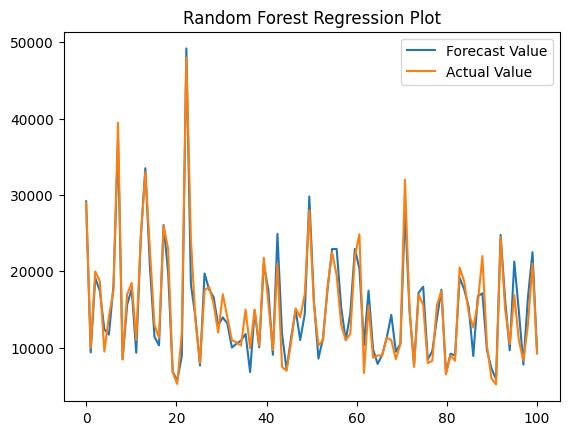

In [42]:
#Plotting using the Random Forest regression model

y_pred_rf1= rf_reg.predict(x_test.iloc[:100,:])

plt.plot(np.linspace(0, len(y_pred_rf1), len(y_pred_rf1)), y_pred_rf1, label = "Forecast Value")
plt.plot(np.linspace(0, len(y_pred_rf1), len(y_pred_rf1)), y_test.iloc[:100], label = "Actual Value")
plt.legend()
plt.title('Random Forest Regression Plot')
plt.show()

r2_score (R-squared) is a commonly used metric to evaluate the performance of regression models. It measures the proportion of variation in the dependent variable (i.e., target variable) that is explained by the independent variables (i.e., features) in the model.

The R-squared value ranges between 0 and 1, with 0 indicating that the model does not explain any of the variation in the target variable, and 1 indicating that the model explains all of the variation in the target variable. A higher R-squared value indicates a better fit of the model to the data.

In [43]:
rf_score = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('RMSE: {:.2f}'.format(rmse))
print('Random Forest Score: {:.2f}'.format(rf_score))

RMSE: 2498.06
Random Forest Score: 0.90


## KNN Regression

In order to implement KNN Regression Model, the KNeighborsRegressor class is used to create a KNN regression model with n_neighbors=5, which means the model will use the 5 nearest neighbors to make predictions. Then, the fit() method is used to train the model on the training data, and the predict() method is used to make predictions on the test data.

In [44]:
# create a KNN regression model with k=5
knn = KNeighborsRegressor(n_neighbors=5)

# train the model on the training data
knn.fit(x_train, y_train)

# make predictions on the test data
y_pred_knn = knn.predict(x_test)

#Actual value and the predicted value
mdl_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_knn})
mdl_diff.head(10)

,Actual value,Predicted value
92597,28989.0,32713.4
33702,9999.0,9254.0
4969,19990.0,19243.8
58187,18728.0,16519.2
46556,9500.0,11096.2
9939,14099.0,11605.2
47565,17450.0,18789.2
54383,39450.0,36225.2
64928,8499.0,8507.2
88032,16995.0,12289.2


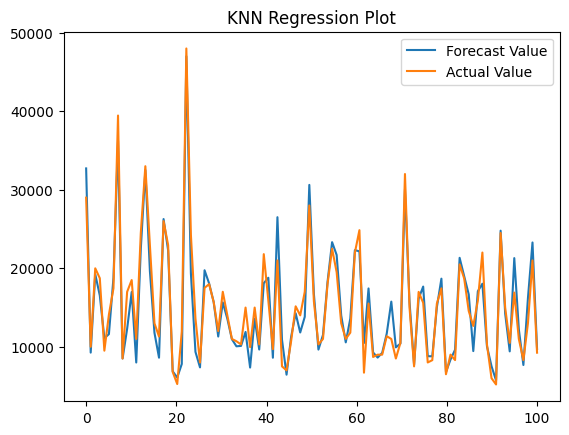

In [45]:
#Plotting using the Random Forest regression model

y_pred_knn1= knn.predict(x_test.iloc[:100,:])

plt.plot(np.linspace(0, len(y_pred_knn1), len(y_pred_knn1)), y_pred_knn1, label = "Forecast Value")
plt.plot(np.linspace(0, len(y_pred_knn1), len(y_pred_knn1)), y_test.iloc[:100], label = "Actual Value")
plt.legend()
plt.title('KNN Regression Plot')
plt.show()

To evaluate the performance of the KNN regression model, score() method of the KNeighborsRegressor class from the scikit-learn library is used.

The score() method returns the coefficient of determination R^2 of the prediction, which is a value between 0 and 1. A value of 1 indicates a perfect prediction, while a value of 0 indicates that the model does not perform better than simply predicting the mean of the target values.

In [46]:
# evaluate the model on the test data
knn_score = knn.score(x_test, y_test)

# calculate the mean squared error (MSE) of the predictions
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print('RMSE: {:.2f}'.format(rmse_knn))
print('Random Forest Score: {:.2f}'.format(knn_score))

RMSE: 2661.20
Random Forest Score: 0.89


## Evaluation (Comparing the different models)

In [47]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','RF Regression', 'KNN Regression']
scores = [linearModel.score(x_test, y_test),
         ridgeModelChosen.score(x_test, y_test),
         lassoModelChosen.score(x_test, y_test),
         rf_score,
         knn_score]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = linearModel.score(x_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(x_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(x_test, y_test)
mapping['Random Forest Regression'] = rf_score
mapping['KNN Regression'] = knn_score

# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regression : 0.782571393649554
Ridge Regression : 0.7825790688086838
Lasso Regression : 0.782252526509452
Random Forest Regression : 0.9042983790326097
KNN Regression : 0.891390212764026


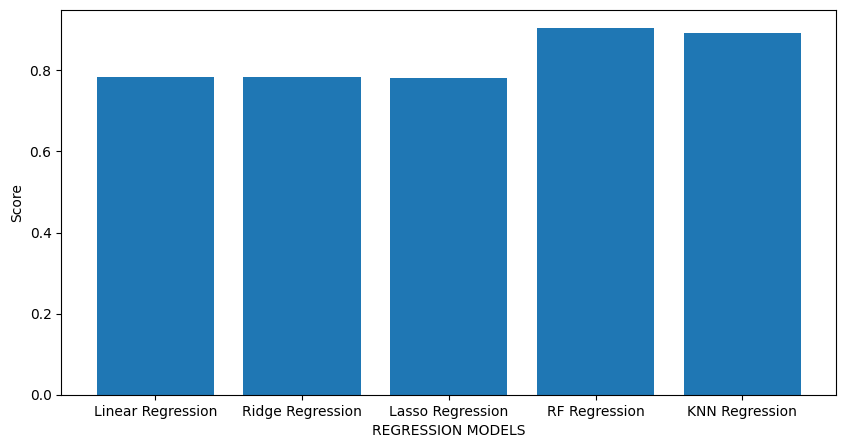

In [48]:
# Plotting the scores
plt.figure(figsize=(10, 5))
plt.bar(models, scores)
plt.xlabel('REGRESSION MODELS')
plt.ylabel('Score')
plt.show()

#Conclusion: We can see that on comparing the scores of all the 4 models, it is evident that in the current context, RF Regression model resulted with the highest score. Hence, it should be the favoured one.